In [0]:
!git clone https://github.com/wjsejdj/LOLWinnerPrediction.git
%cd LOLWinnerPrediction

fatal: destination path 'LOLWinnerPrediction' already exists and is not an empty directory.
/content/LOLWinnerPrediction


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [0]:
df = pd.read_csv('datas/games.csv')

In [0]:
case1_col_str ='t1_champ1id	t1_champ1_sum1	t1_champ1_sum2	t1_champ2id	t1_champ2_sum1	t1_champ2_sum2	t1_champ3id	t1_champ3_sum1	t1_champ3_sum2	t1_champ4id	t1_champ4_sum1	t1_champ4_sum2	t1_champ5id	t1_champ5_sum1	t1_champ5_sum2	t1_ban1	t1_ban2	t1_ban3	t1_ban4	t1_ban5	t2_champ1id	t2_champ1_sum1	t2_champ1_sum2	t2_champ2id	t2_champ2_sum1	t2_champ2_sum2	t2_champ3id	t2_champ3_sum1	t2_champ3_sum2	t2_champ4id	t2_champ4_sum1	t2_champ4_sum2	t2_champ5id	t2_champ5_sum1	t2_champ5_sum2	t2_ban1	t2_ban2	t2_ban3	t2_ban4	t2_ban5'
case1_cols = case1_col_str.split("\t")

case2_col_str = 'gameDuration	firstBlood	firstTower	firstInhibitor	firstBaron	firstDragon	firstRiftHerald	t1_towerKills	t1_inhibitorKills	t1_baronKills	t1_dragonKills	t1_riftHeraldKills	t2_towerKills	t2_inhibitorKills	t2_baronKills	t2_dragonKills	t2_riftHeraldKills'
case2_cols=case2_col_str.split("\t")

case3_cols = case1_cols+case2_cols

In [0]:
case1_rows = df[case1_cols]
case2_rows = df[case2_cols]
case3_rows = df[case3_cols]
target = df['winner']

In [0]:
case1_train_input, case1_test_input, case1_train_target, case1_test_target = train_test_split(case1_rows, target, test_size = 0.25)
case2_train_input, case2_test_input, case2_train_target, case2_test_target = train_test_split(case2_rows, target, test_size = 0.25)
case3_train_input, case3_test_input, case3_train_target, case3_test_target = train_test_split(case3_rows, target, test_size = 0.25)

# Logistci Regression

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## test1 Only Team Info

In [0]:
clf.fit(case1_train_input,case1_train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(case1_test_input,case1_test_target)

0.5175172842383283

## test2 Only Game Info

In [0]:
clf.fit(case2_train_input,case2_train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(case2_test_input,case2_test_target)

0.9610813330226055

## test3 Team Info and Game Info


In [0]:
clf.fit(case3_train_input,case3_train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(case3_test_input,case3_test_target)

0.9629457003029597

# Desicion Tree

In [0]:
from sklearn import tree
import graphviz
clf = tree.DecisionTreeClassifier(max_depth=5)

## test1 Only Team Info

In [0]:
clf.fit(case1_train_input,case1_train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
clf.score(case1_test_input,case1_test_target)

0.5155752349879593

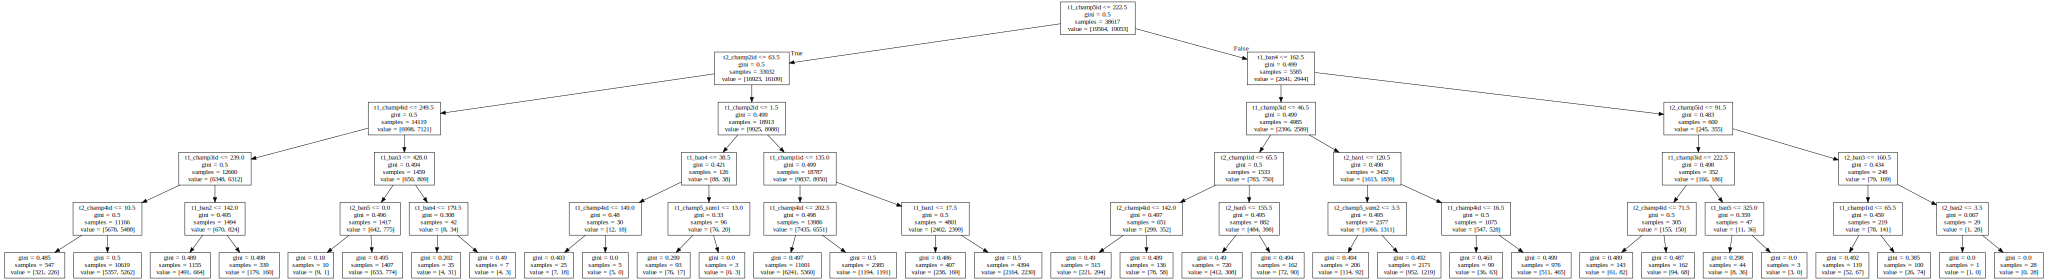

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=case1_cols)
graph = graphviz.Source(dot_data)
graph

## test2 Only Game Info

In [0]:
clf.fit(case2_train_input,case2_train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
clf.score(case2_test_input,case2_test_target)

0.9620135166627826

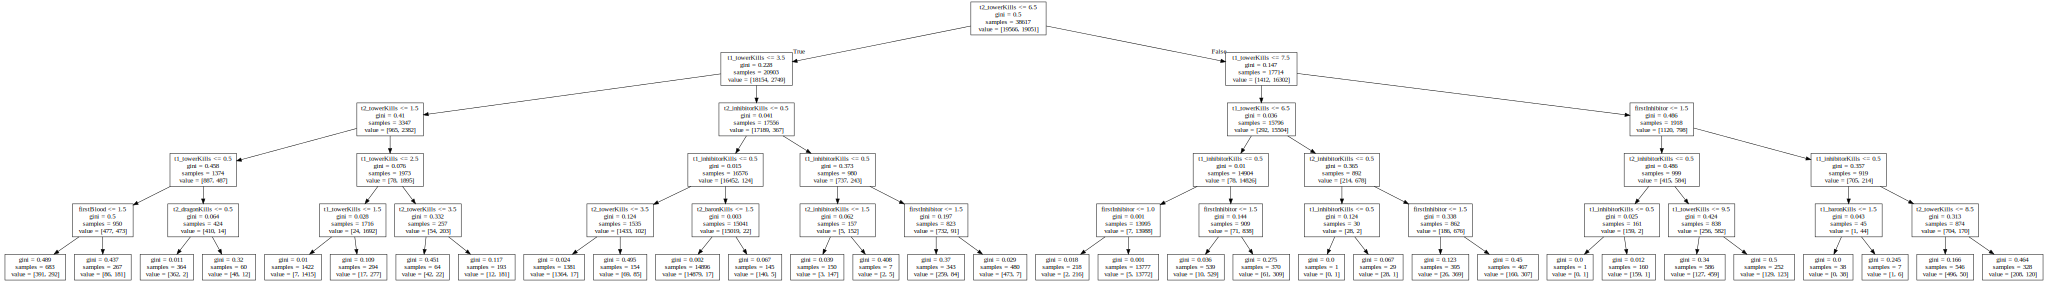

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=case2_cols)
graph = graphviz.Source(dot_data)
graph

## test3 Team Info and Game Info


In [0]:
clf.fit(case3_train_input,case3_train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
clf.score(case3_test_input,case3_test_target)

0.9648877495533287

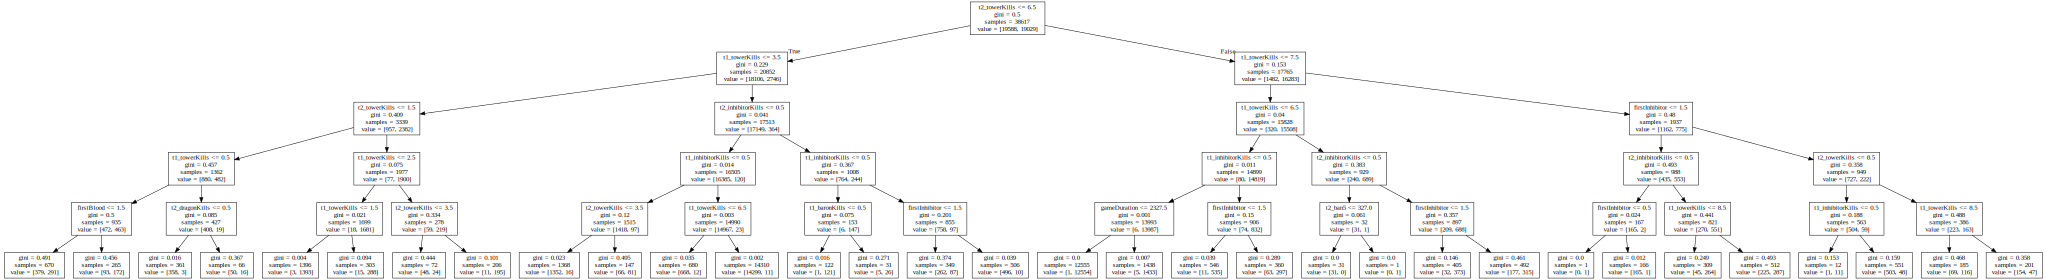

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=case3_cols)
graph = graphviz.Source(dot_data)
graph

# SVM

In [0]:
from sklearn import svm
clf = svm.SVC()

## case1 Only Team Info

In [0]:
clf.fit(case1_train_input,case1_train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
clf.score(case1_test_input,case1_test_target)

0.5107589528470442

## case2 Only Game Info

In [0]:
clf.fit(case2_train_input,case2_train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
clf.score(case2_test_input,case2_test_target)

0.9580517361920299

## case3 Team Info And Game Info

In [0]:
clf.fit(case3_train_input,case3_train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
clf.score(case3_test_input,case3_test_target)

0.5106812708770294